<a href="https://colab.research.google.com/github/atharvv8/ml_practice/blob/main/2_svm_kernel_non_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [8]:
!pip install scikit-learn

In [11]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 100, factor = .1, noise = .1)

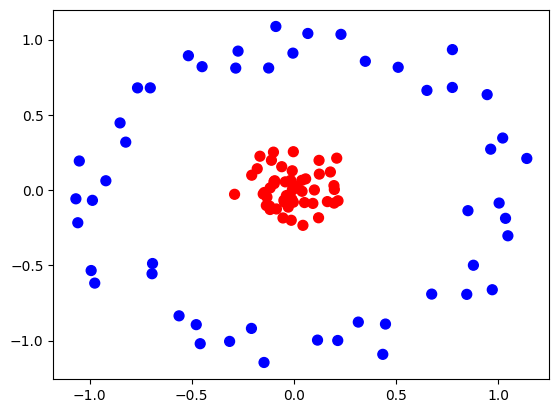

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [15]:
## FIRST applying Linear kernel

classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train.ravel()) #ravel() returns a flattened array
y_predd = classifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predd) #60%

0.6

In [18]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
  X_set, y_set = X, y
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1, step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, cmap = zero_one_colourmap)
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = zero_one_colourmap(i), label = j)
    plt.title('Decision Boundary')
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.legend()
  return plt.show()


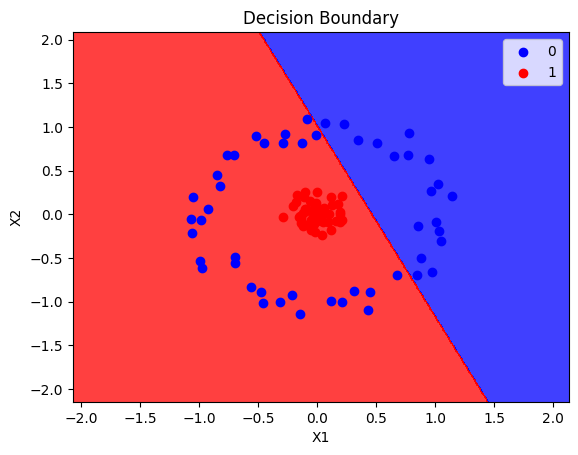

In [20]:
plot_decision_boundary(X, y, classifier)

In [21]:
def plot_3d_plot(X, y):
  r=np.exp(-(X **2).sum(1))
  ax = plt.axes(projection='3d')
  ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  ax.set_zlabel('y')
  return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

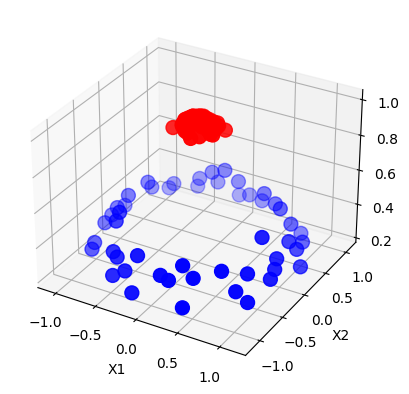

In [22]:
plot_3d_plot(X, y)

In [23]:
#RBF Kernel
rbf_classifier  = SVC(kernel='rbf')
rbf_classifier.fit(X_train, y_train)
y_pred_rbf = rbf_classifier.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred_rbf) #100 percent accuracy

1.0

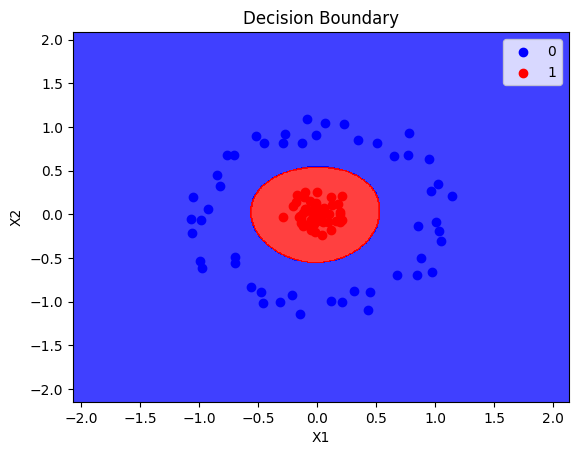

In [25]:
plot_decision_boundary(X, y, rbf_classifier)

In [26]:
#polynomial kernel

poly_classifier = SVC(kernel='poly', degree=2)
poly_classifier.fit(X_train, y_train)
y_pred_poly = poly_classifier.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred_poly) #100 percent accuracy

1.0

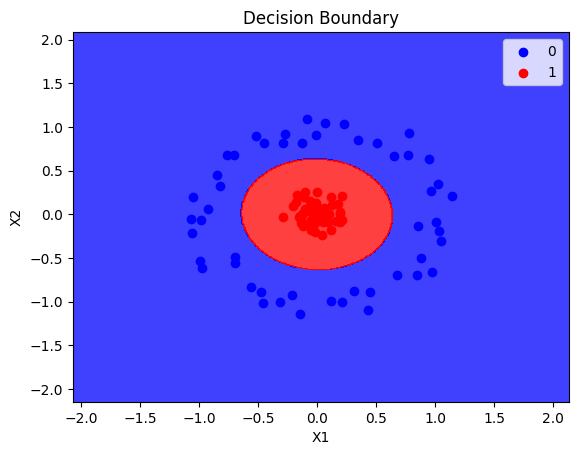

In [28]:
plot_decision_boundary(X, y, poly_classifier)